<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Early-Stopping-in-Practice-tensorflow-2" data-toc-modified-id="Early-Stopping-in-Practice-tensorflow-2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Early Stopping in Practice tensorflow 2</a></span><ul class="toc-item"><li><span><a href="#With-Stochastic-and-Mini-batch-Gradient-Descent" data-toc-modified-id="With-Stochastic-and-Mini-batch-Gradient-Descent-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>With Stochastic and Mini-batch Gradient Descent</a></span></li></ul></li><li><span><a href="#Adding-Early-Stopping" data-toc-modified-id="Adding-Early-Stopping-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Adding Early Stopping</a></span><ul class="toc-item"><li><span><a href="#EarlyStopping()-has-a-few-options-and-by-default:" data-toc-modified-id="EarlyStopping()-has-a-few-options-and-by-default:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>EarlyStopping() has a few options and by default:</a></span></li></ul></li><li><span><a href="#Customizing-Early-Stopping" data-toc-modified-id="Customizing-Early-Stopping-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Customizing Early Stopping</a></span></li></ul></div>

# Early Stopping in Practice tensorflow 2

Early Stopping is a very different way to regularize the machine learning model. The way it does is to stop training as soon as the validation error reaches a minimum. The figure below shows a model being trained.

![](./i/1iAK5uMoOlX1gZu-cSh1nZw.png)

As the epochs go by, the algorithm leans and its error on the training set naturally goes down, and so does its error on the validation set. However, after a while, the validation error stops decreasing and actually starts to go back up. This indicates that the model has started to overfit the training data. With Early Stopping, you just stop training as soon as the validation error reaches the minimum.

It is such a simple and efficient regularization technique that Geoffrey Hinton called it a “beautiful free lunch.” [1].



## With Stochastic and Mini-batch Gradient Descent

With Stochastic and Mini-batch Gradient Descent, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not. One solution is to stop only after the validation error has been above the minimum for some time (when you are confident that the model will not do any better), then roll back the model parameters to the point where the validation error was at a minimum.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

# For the purpose of exploring data, let’s load data into a DataFrame

# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

df.head()

# We notice the label column is a categorical feature and will need to convert it
# to one-hot encoding. Otherwise, our machine learning algorithm won’t be able 
# to directly take in that as input.

# label -> one-hot encoding
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)
# drop old label
df.drop(['label'], axis=1, inplace=True)

df.head()


# Creating X and yX = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
# 'petal width (cm)']]
# Convert DataFrame into np array
# Creating X and y

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)

y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)


# Split the data set in a training set (75%) and a test set (25%)
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.25
)
# Build a neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(): 
    model = Sequential([
        Dense(64, activation='relu', input_shape=(4,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax'),
    ])
    return model

model = create_model()

# Compile the model
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

# Fit the model to the training data
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)


%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

Train on 84 samples, validate on 28 samples
Epoch 1/200
84/84 - 1s - loss: 1.1083 - accuracy: 0.4643 - val_loss: 1.0305 - val_accuracy: 0.3214
Epoch 2/200
84/84 - 0s - loss: 1.0022 - accuracy: 0.4048 - val_loss: 0.9901 - val_accuracy: 0.3214
Epoch 3/200
84/84 - 0s - loss: 0.9295 - accuracy: 0.5357 - val_loss: 0.8740 - val_accuracy: 0.6786
Epoch 4/200
84/84 - 0s - loss: 0.8230 - accuracy: 0.6667 - val_loss: 0.8140 - val_accuracy: 0.6786
Epoch 5/200
84/84 - 0s - loss: 0.7507 - accuracy: 0.6667 - val_loss: 0.7261 - val_accuracy: 0.6786
Epoch 6/200
84/84 - 0s - loss: 0.6640 - accuracy: 0.6667 - val_loss: 0.5849 - val_accuracy: 0.6786
Epoch 7/200
84/84 - 0s - loss: 0.5665 - accuracy: 0.6786 - val_loss: 0.4668 - val_accuracy: 0.8214
Epoch 8/200
84/84 - 0s - loss: 0.4662 - accuracy: 0.7857 - val_loss: 0.3884 - val_accuracy: 0.9286
Epoch 9/200
84/84 - 0s - loss: 0.4134 - accuracy: 0.8929 - val_loss: 0.3280 - val_accuracy: 0.9286
Epoch 10/200
84/84 - 0s - loss: 0.3338 - accuracy: 0.9762 - val_l

Epoch 83/200
84/84 - 0s - loss: 0.0441 - accuracy: 0.9881 - val_loss: 0.1724 - val_accuracy: 0.9643
Epoch 84/200
84/84 - 0s - loss: 0.0491 - accuracy: 0.9881 - val_loss: 0.1909 - val_accuracy: 0.9643
Epoch 85/200
84/84 - 0s - loss: 0.0429 - accuracy: 0.9881 - val_loss: 0.2156 - val_accuracy: 0.9643
Epoch 86/200
84/84 - 0s - loss: 0.0463 - accuracy: 0.9881 - val_loss: 0.1915 - val_accuracy: 0.9643
Epoch 87/200
84/84 - 0s - loss: 0.0418 - accuracy: 0.9881 - val_loss: 0.1762 - val_accuracy: 0.9643
Epoch 88/200
84/84 - 0s - loss: 0.0559 - accuracy: 0.9881 - val_loss: 0.2172 - val_accuracy: 0.9643
Epoch 89/200
84/84 - 0s - loss: 0.0487 - accuracy: 0.9881 - val_loss: 0.1966 - val_accuracy: 0.8929
Epoch 90/200
84/84 - 0s - loss: 0.1786 - accuracy: 0.9405 - val_loss: 0.3021 - val_accuracy: 0.8571
Epoch 91/200
84/84 - 0s - loss: 0.2183 - accuracy: 0.9167 - val_loss: 0.3338 - val_accuracy: 0.8929
Epoch 92/200
84/84 - 0s - loss: 0.2185 - accuracy: 0.8929 - val_loss: 0.3051 - val_accuracy: 0.9286


Epoch 165/200
84/84 - 0s - loss: 0.1686 - accuracy: 0.9167 - val_loss: 0.1872 - val_accuracy: 0.9286
Epoch 166/200
84/84 - 0s - loss: 0.0770 - accuracy: 0.9762 - val_loss: 0.1459 - val_accuracy: 0.9286
Epoch 167/200
84/84 - 0s - loss: 0.1351 - accuracy: 0.9405 - val_loss: 0.1322 - val_accuracy: 0.9643
Epoch 168/200
84/84 - 0s - loss: 0.0623 - accuracy: 0.9881 - val_loss: 0.2399 - val_accuracy: 0.8929
Epoch 169/200
84/84 - 0s - loss: 0.1092 - accuracy: 0.9643 - val_loss: 0.3130 - val_accuracy: 0.8929
Epoch 170/200
84/84 - 0s - loss: 0.1263 - accuracy: 0.9524 - val_loss: 0.1977 - val_accuracy: 0.9286
Epoch 171/200
84/84 - 0s - loss: 0.0640 - accuracy: 0.9881 - val_loss: 0.1415 - val_accuracy: 0.9643
Epoch 172/200
84/84 - 0s - loss: 0.0648 - accuracy: 0.9762 - val_loss: 0.1631 - val_accuracy: 0.9286
Epoch 173/200
84/84 - 0s - loss: 0.1932 - accuracy: 0.9286 - val_loss: 0.2060 - val_accuracy: 0.8571
Epoch 174/200
84/84 - 0s - loss: 0.1788 - accuracy: 0.9405 - val_loss: 0.1496 - val_accurac

38/1 - 0s - loss: 0.0158 - accuracy: 0.9737


[0.031547210532248994, 0.9736842]

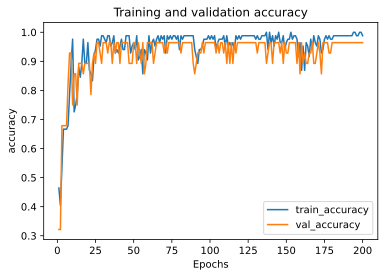

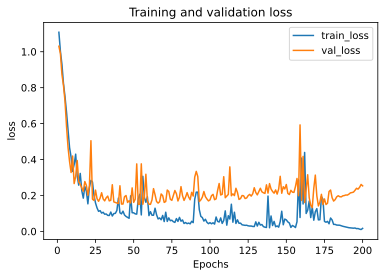

In [2]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)
plot_metric(history, 'accuracy')
plot_metric(history, 'loss')

# Adding Early Stopping

The Keras module contains a built-in callback designed for Early Stopping [2].

First, let’s import EarlyStopping callback and create an early stopping object early_stopping .

## EarlyStopping() has a few options and by default:

    1- monitor='val_loss': to use validation loss as performance measure to terminate the training.
    2-  patience=0: is the number of epochs with no improvement. The value 0 means the training is terminated as soon as the performance measure gets worse from one epoch to the next.

Next, we just need to pass the callback object to model.fit() method.

In [3]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping() # by default, monitor='val_loss' and patience=1

history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2,
    callbacks=[early_stopping]
)

Train on 84 samples, validate on 28 samples
Epoch 1/200
84/84 - 0s - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.2587 - val_accuracy: 0.9643
Epoch 2/200
84/84 - 0s - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.2652 - val_accuracy: 0.9643


EarlyStopping() has a few options and by default:

    monitor='val_loss': to use validation loss as performance measure to terminate the training.
    patience=0: is the number of epochs with no improvement. The value 0 means the training is terminated as soon as the performance measure gets worse from one epoch to the next.

Next, we just need to pass the callback object to model.fit() method.

38/1 - 0s - loss: 0.0252 - accuracy: 0.9737


[0.05028985356128894, 0.9736842]

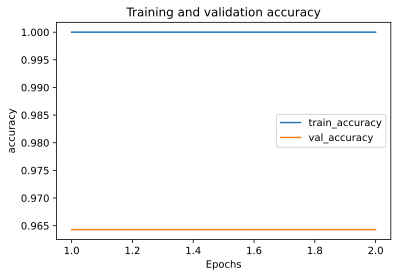

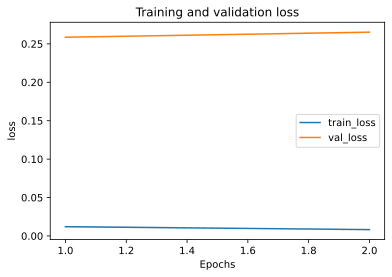

In [4]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)
plot_metric(history, 'accuracy')
plot_metric(history, 'loss')

# Customizing Early Stopping




Customizing Early Stopping

Apart from the options monitor and patience we mentioned early, the other 2 options min_delta and mode are likely to be used quite often.

   1. monitor='val_loss': to use validation loss as performance measure to terminate the training.
   2. patience=0: is the number of epochs with no improvement. The value 0 means the training is terminated as soon as the performance measure gets worse from one epoch to the next.
   3. min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.
   4. mode='auto': Should be one of auto, min or max. In 'min' mode, training will stop when the quantity monitored has stopped decreasing; in 'max' mode it will stop when the quantity monitored has stopped increasing; in 'auto' mode, the direction is automatically inferred from the name of the monitored quantity.
   
   
monitor='val_accuracy' to use validation accuracy as performance measure to terminate the training. patience=8 means the training is terminated as soon as 8 epochs with no improvement. min_delta=0.001 means the validation accuracy has to improve by at least 0.001 for it to count as an improvement. mode='max' means it will stop when the quantity monitored has stopped increasing.

Let’s go ahead and run it with the customized early stopping.

In [8]:
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=6, 
    min_delta=0.001, 
    mode='max'
)

In [9]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2,
    callbacks=[custom_early_stopping]
)

Train on 84 samples, validate on 28 samples
Epoch 1/200
84/84 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.3013 - val_accuracy: 0.9643
Epoch 2/200
84/84 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.3117 - val_accuracy: 0.9643
Epoch 3/200
84/84 - 0s - loss: 0.0364 - accuracy: 0.9762 - val_loss: 0.8098 - val_accuracy: 0.8929
Epoch 4/200
84/84 - 0s - loss: 1.4889 - accuracy: 0.7976 - val_loss: 0.4195 - val_accuracy: 0.8571
Epoch 5/200
84/84 - 0s - loss: 0.2079 - accuracy: 0.9286 - val_loss: 0.6245 - val_accuracy: 0.8571
Epoch 6/200
84/84 - 0s - loss: 0.4525 - accuracy: 0.8571 - val_loss: 0.2168 - val_accuracy: 0.9286
Epoch 7/200
84/84 - 0s - loss: 0.0965 - accuracy: 0.9762 - val_loss: 0.1622 - val_accuracy: 0.9286


38/1 - 0s - loss: 0.0872 - accuracy: 0.9474


[0.12138288448515691, 0.94736844]

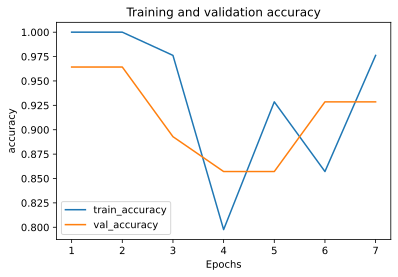

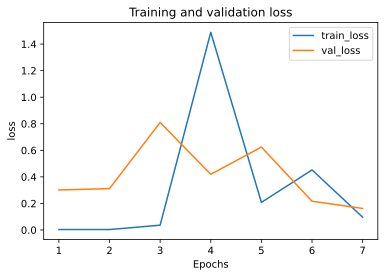

In [10]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)
plot_metric(history, 'accuracy')
plot_metric(history, 'loss')